<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célula e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços dos imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

Observação:

Os dados originais foram modificados para simplificar o trabalho.

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [3]:
#importando os dados, temos:
base_dados = pd.read_csv('HousePrices_HalfMil.csv', sep = ';')
base_dados.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


In [4]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [14]:
base_dados['garagem'].value_counts()

2    339
3    335
1    326
Name: garagem, dtype: int64

In [15]:
base_dados['banheiros'].value_counts()

4    232
1    216
5    191
2    182
3    179
Name: banheiros, dtype: int64

In [16]:
base_dados['lareira'].value_counts()

3    210
4    205
0    198
2    197
1    190
Name: lareira, dtype: int64

In [18]:
base_dados['marmore'].value_counts()

0    669
1    331
Name: marmore, dtype: int64

In [19]:
base_dados['andares'].value_counts()

0    515
1    485
Name: andares, dtype: int64

In [5]:
base_dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


Como podemos verificar, não temos valores nulos na base de dados. Portanto, não precisamos fazer um tratamento para os valores faltantes.

## Visualizar os dados

Para visualizar os dados, podemos construir distribuições de frequência para as variáveis 'preços', 'area', 'garagem', 'banheiros' e 'lareira' para verificar as distribuições dos dados.

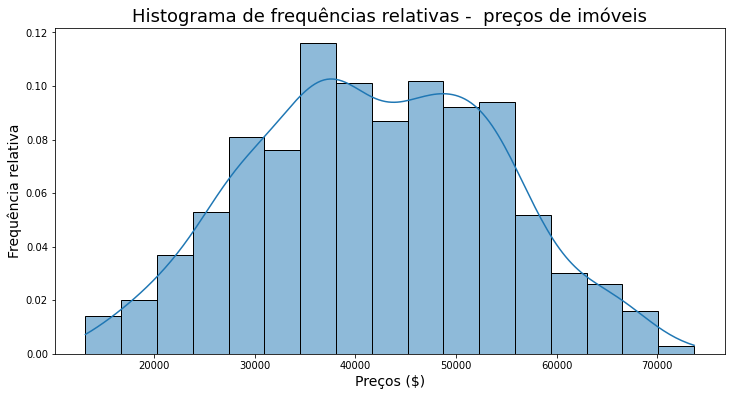

In [6]:
#Construindo um histograma para observar graficamente a distribuição dos dados de preços, temos:

ax = sns.histplot(data = base_dados['precos'], stat = 'proportion',kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de frequências relativas -  preços de imóveis', fontsize = 18)
ax.set_xlabel('Preços ($)', fontsize = 14)
ax.set_ylabel('Frequência relativa', fontsize = 14)
ax

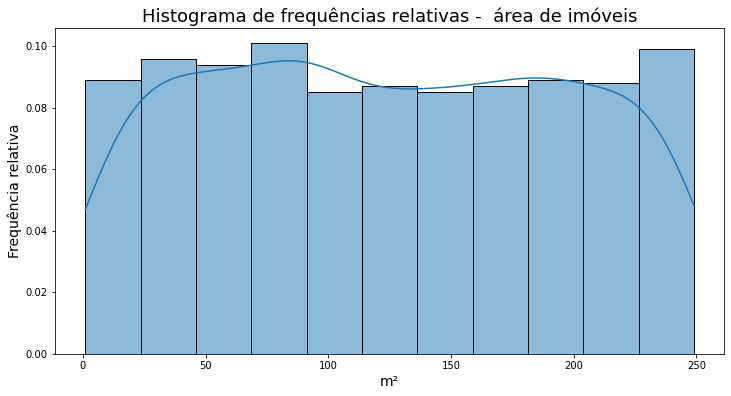

In [7]:
#Construindo um histograma para observar graficamente a distribuição dos dados de area, temos:

ax = sns.histplot(data = base_dados['area'], stat = 'proportion',kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de frequências relativas -  área de imóveis', fontsize = 18)
ax.set_xlabel('m²', fontsize = 14)
ax.set_ylabel('Frequência relativa', fontsize = 14)
ax

A partir das distribuições de frequência acima, foi possível fazer uma inspeção visual da distribuição dos dados de preços e áreas de imóveis a venda.

## Verificando o tamanho do dataset

In [9]:
#quantidade de dados
base_dados.shape[0]

1000

In [10]:
#quantidade de características
base_dados.shape[1]

7

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [11]:
base_dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


A partir das estatísticas descritivas para a base de dados, podemos visualizar possíveis inconsistências nos dados. Por exemplo, dados com áreas negativas seriam dados errôneos inseridos na base de dados. Caso fossem encontrados dados com área negativa, tal dado deveria ser tratado (removido ou ter o valor substituído pela média, por exemplo) para não influenciar negativamente no desempenho do algoritmo de aprendizado de máquina.

Na análise descritiva, são encontrados dados com valor de área de 1 m². Talvez, tais dados estejam incorretos. Como a base de dados não informa a unidade utilizada como medida de área, não podemos afirmar se são ou não incorretos.

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependente (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [20]:
#construindo a matriz de correlação, temos:
base_dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


Também podemos utilizar o mapa de calor de correlações da biblioteca Seaborn para melhor visualização das correlações entre as variáveis.

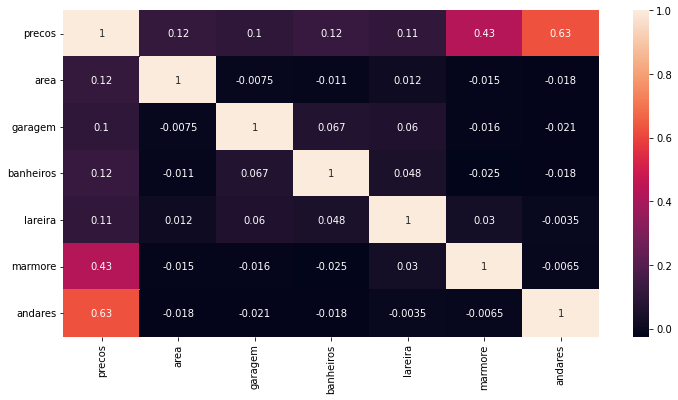

In [24]:
#construindo o mapa de calor de correlações, temos:
ax = sns.heatmap(base_dados.corr(), annot = True)
ax.figure.set_size_inches(12,6)

Como podemos verificar, os preços dos imóveis apresentam uma boa correlação linear com a variável 'marmore' e 'andares', apresentando correlações positivas de 0,43 e 0,63, respectivamente. Imóveis com acabamento em mármore branco apresentam valor superior. Em relação ao número de andares, o preço é maior para imóveis com mais de 1 andar.

Para construção de algoritmos de aprendizado de máquina, é importante que as características explicativas não possuam correlações altas entre si. Visualizando a matriz de correlação, é possível verificar que as correlações entre as variáveis explicativas são baixas.

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

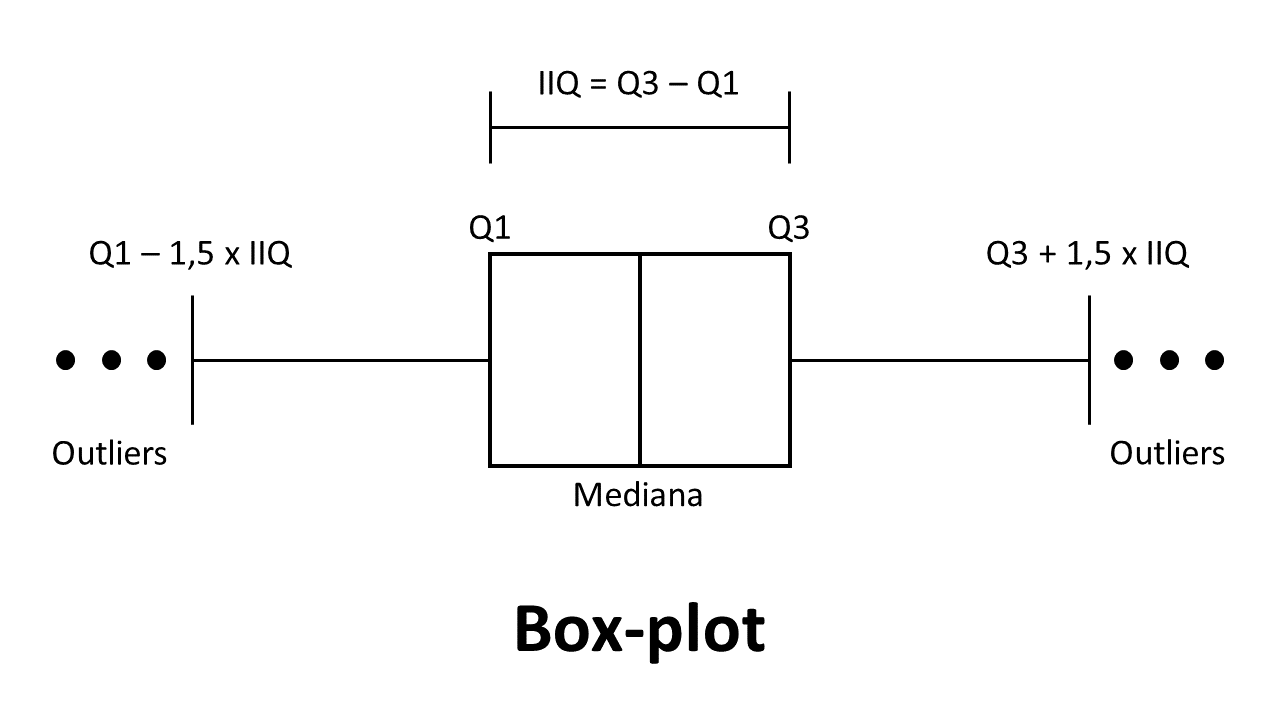

## Importando biblioteca seaborn

In [25]:
import seaborn as sns

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

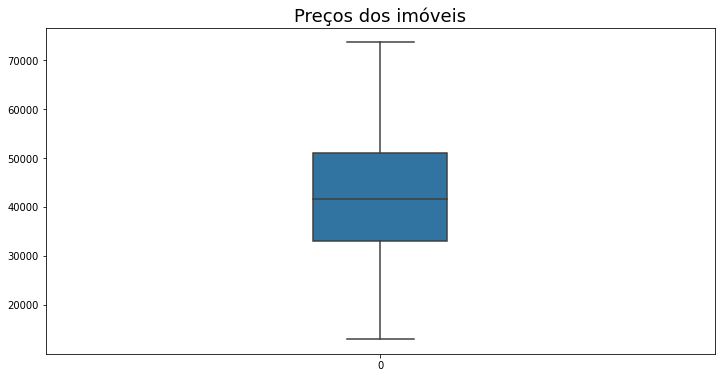

In [32]:
#plotando o boxplot da variável dependente preços, temos:

ax = sns.boxplot(data = base_dados['precos'], width = 0.2)
ax.figure.set_size_inches(12,6) #tamanho da figura
ax.set_title('Preços dos imóveis',fontsize = 18) #configurando o título do gráfico
ax

In [34]:
base_dados['precos'].quantile([0.25,0.75])

0.25    33112.5
0.75    51175.0
Name: precos, dtype: float64

Os dados de preços dos imóveis, aparentemente, não apresentam tendências assimétricas, com a maioria dos valores situados entre 33112 e 51175. Além disso, não há valores de outliers.

## Investigando a variável *dependente* (y) juntamente com outras características

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

Identificando as variáveis cataegórias, temos:

In [35]:
base_dados.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


As variáveis categóricas são: 'garagem', 'banheiros', 'lareira', 'marmore' e 'andares'. Agora vamos avaliar o comportamento da variável dependente 'preços' em relação às variáveis explicativas categóricas.

### Box-plot (Preço X Garagem)

In [55]:
labels = [str(item) for item in base_dados['garagem'].unique()]
labels.sort()
labels

['1', '2', '3']

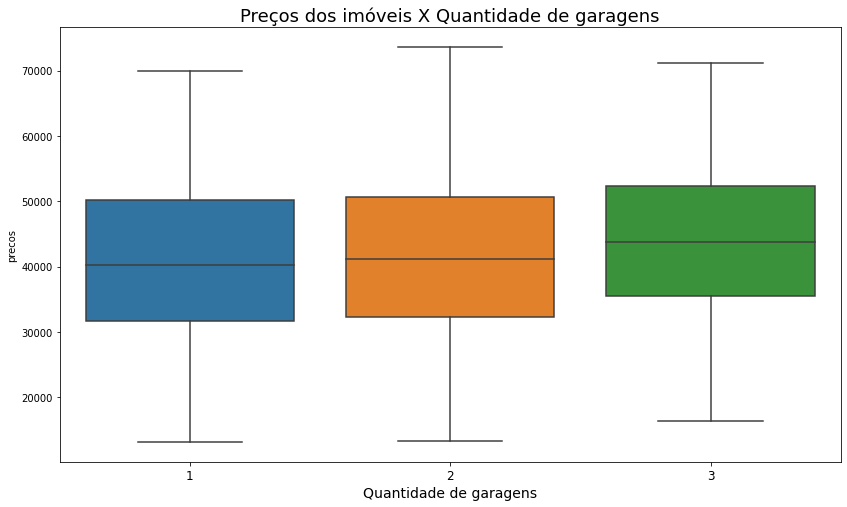

In [56]:
#plotando o boxplot, temos:
ax = sns.boxplot(x = 'garagem',y = 'precos', data = base_dados)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Preços dos imóveis X Quantidade de garagens',fontsize = 18) #configurando o título do gráfico
ax.set_xlabel('Quantidade de garagens',fontsize = 14) #configurando o eixo x
ax.set_xticklabels(labels = labels, fontsize = 12) #configurando os labels do eixo x
ax

Há uma pequena tendência de aumento nos preços com o aumento do número de garagens no imóvel. Tal resultadop já era esperado, tendo em vista que a correlação linear entre preços e quantidade de garagens é positiva, como indicado na matriz de correlação.

### Box-plot (Preço X Banheiros)

In [57]:
labels = [str(item) for item in base_dados['banheiros'].unique()]
labels.sort()
labels

['1', '2', '3', '4', '5']

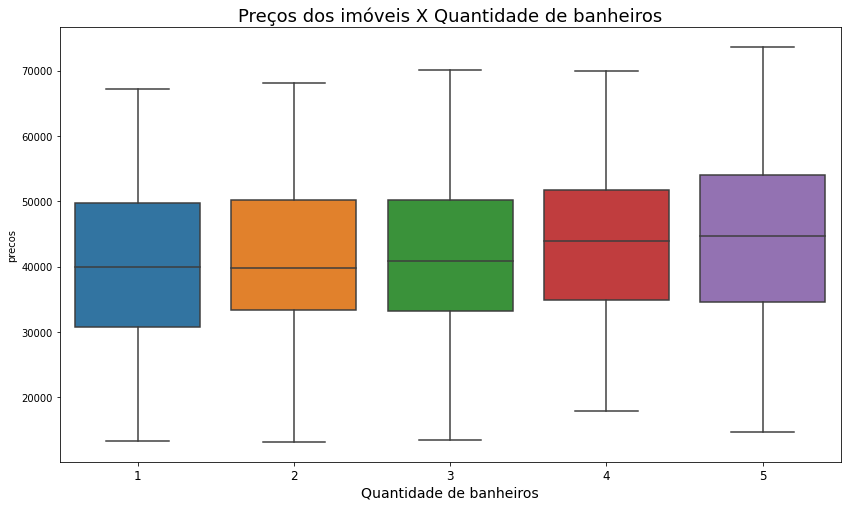

In [58]:
#plotando o boxplot, temos:
ax = sns.boxplot(x = 'banheiros',y = 'precos', data = base_dados)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Preços dos imóveis X Quantidade de banheiros',fontsize = 18) #configurando o título do gráfico
ax.set_xlabel('Quantidade de banheiros',fontsize = 14) #configurando o eixo x
ax.set_xticklabels(labels = labels, fontsize = 12) #configurando os labels do eixo x
ax

É observado uma tendência de aumento dos preços dos imóveis com o aumento do número de banheiros. Como vimos na matriz de correlação, há uma correlação linear positiva entre os preços dos imóveis e a quantidade de banheiros.

### Box-plot (Preço X Lareira)

In [63]:
labels = [str(item) for item in base_dados['lareira'].unique()]
labels.sort()
labels

['0', '1', '2', '3', '4']

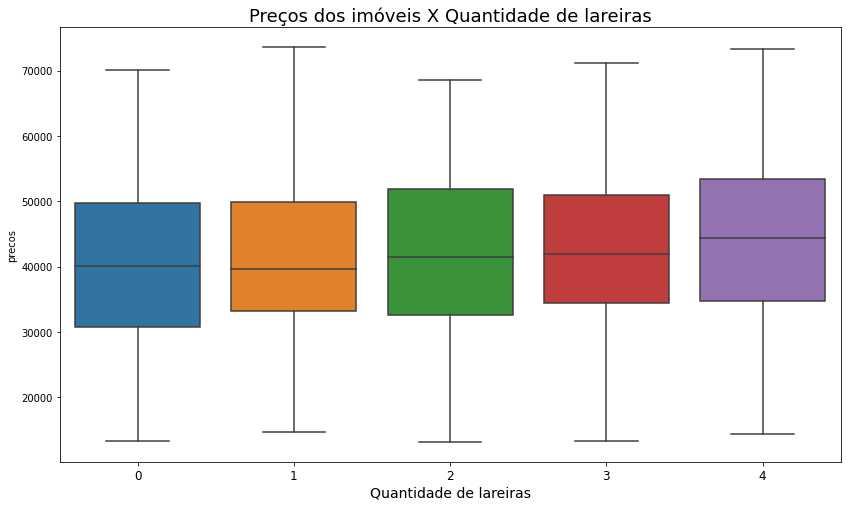

In [64]:
#plotando o boxplot, temos:
ax = sns.boxplot(x = 'lareira',y = 'precos', data = base_dados)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Preços dos imóveis X Quantidade de lareiras',fontsize = 18) #configurando o título do gráfico
ax.set_xlabel('Quantidade de lareiras',fontsize = 14) #configurando o eixo x
ax.set_xticklabels(labels = labels, fontsize = 12) #configurando os labels do eixo x
ax

### Box-plot (Preço X Acabamento em Mármore)

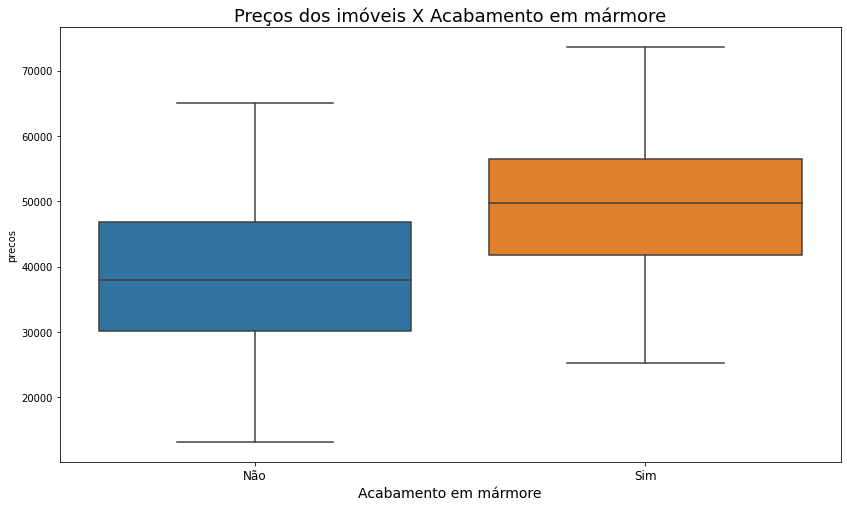

In [66]:
#plotando o boxplot, temos:
ax = sns.boxplot(x = 'marmore',y = 'precos', data = base_dados)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Preços dos imóveis X Acabamento em mármore',fontsize = 18) #configurando o título do gráfico
ax.set_xlabel('Acabamento em mármore',fontsize = 14) #configurando o eixo x
ax.set_xticklabels(labels = ['Não','Sim'], fontsize = 12) #configurando os labels do eixo x
ax

Como podemos ver, o preço do imóvel aumenta consideravelmente quando o acabamento é feito em mármore branco.

### Box-plot (Preço X Andares)

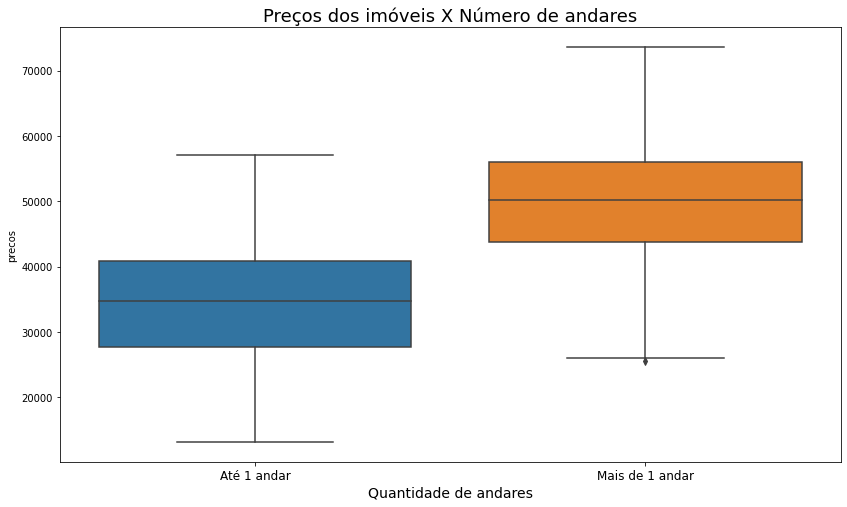

In [68]:
#plotando o boxplot, temos:
ax = sns.boxplot(x = 'andares',y = 'precos', data = base_dados)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Preços dos imóveis X Número de andares',fontsize = 18) #configurando o título do gráfico
ax.set_xlabel('Quantidade de andares',fontsize = 14) #configurando o eixo x
ax.set_xticklabels(labels = ['Até 1 andar','Mais de 1 andar'], fontsize = 12) #configurando os labels do eixo x
ax

Como podemos verificar, o preço do imóvel aumenta significativamente para imóveis com mais de 1 andar.

Conclusão:

Os boxplots que apresentam uma tendência mais bem definida são os boxplots para as variáveis 'andares' e 'marmore'. Tal resultado já era previsto, pois há uma boa correlação linear entre as duas variáveis explicativas e a variável dependente.

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

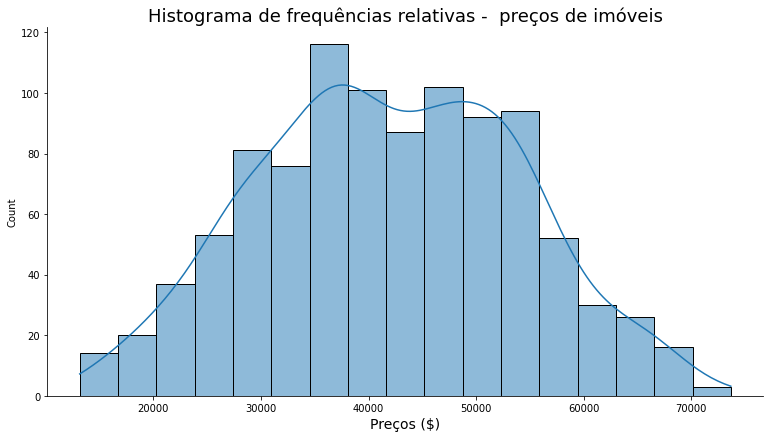

In [76]:
#Construindo um histograma para observação da distribuição dos dados de consumo de cerveja:
ax = sns.displot(data = base_dados['precos'],kind = 'hist', kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Histograma de frequências relativas -  preços de imóveis', fontsize = 18)
plt.xlabel('Preços ($)', fontsize = 14)
ax

Conclusão:

Os dados da variável dependente 'preços' não apresenta assimetria, ou seja, os dados são simétricos. Além disso, a distribuição dos dados possui, aproximadamente, forma de sino. Logo, podemos considerar que os dados de preços são aproximadamente normais. No presente trabalho, apenas a inspeção visual a partir de histogramas é o suficiente para verificar se os dados são aproximadamente normais. Porém, há casos onde devemos utilizar métodos formais para testar a normalidade da distribuição dos dados. Há importantes métodos estatísticos que são utilizados apenas para dados normalmente distribuídos, daí a importância dos testes de normalidade.

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

O gráfico de dispersão é utilizado para visualizar se há ou não alguma tendência linear entre a variável dependente e as variáveis explicativas.

In [77]:
base_dados.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

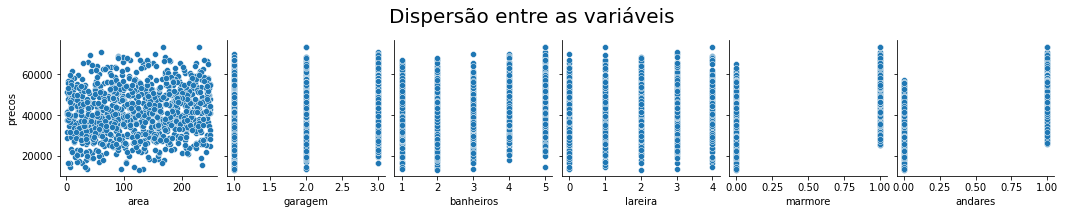

In [80]:
#plotando os gráficos de dispersão, temos:
ax = sns.pairplot(base_dados, y_vars = 'precos',x_vars = ['area','garagem','banheiros','lareira','marmore','andares'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15)
ax

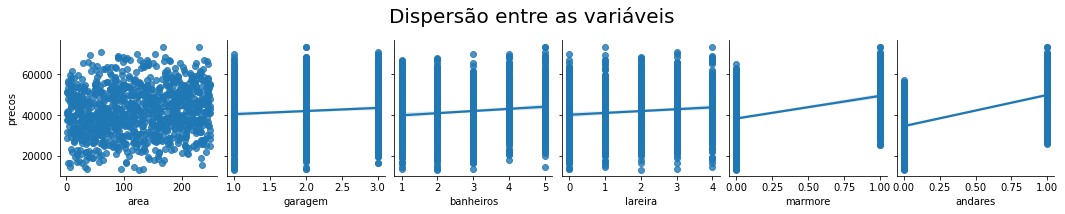

In [81]:
#plotando os gráficos de dispersão, temos:
ax = sns.pairplot(base_dados, y_vars = 'precos',x_vars = ['area','garagem','banheiros','lareira','marmore','andares'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15)
ax

Conclusão:

Como podemos ver através dos gráficos de dispersão, há uma pequena tendência linear entre as variáveis explicativas e a variável dependente. Além disso, a tendênciar linear é pequena para as variáveis área, garagem, banheiros e lareira, enquanto é observado uma tendência linear maior entre as variáveis marmore e andares. Este resultado está de acordo com o observado na matriz de correlação, uma vez que os maiores coeficientes de correlação foram encontrados para as duas últimas.

Para a variável area, nota-se uma grande variação nos preços. 

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

a função train_test_split é repsonsável por dividir o conjunto de dados em dados de treinamento e teste.

In [82]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [83]:
y = base_dados['precos']
y.head(10)

0    51875
1    17875
2    47075
3    38575
4    33775
5    35450
6    52025
7    37550
8    31500
9    37650
Name: precos, dtype: int64

In [86]:
y.shape

(1000,)

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [84]:
base_dados.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

In [85]:
X = base_dados[['area','garagem','banheiros','lareira','marmore','andares']]
X.head(10)

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
5,148,2,5,2,0,0
6,211,2,3,2,1,0
7,172,2,2,3,1,0
8,62,1,4,2,0,0
9,218,3,1,0,1,0


In [87]:
X.shape

(1000, 6)

## Criando os datasets de treino e de teste

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [90]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [91]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [92]:
print('R² do modelo, a partir da estimativa com dados de treino: {}'.format(modelo.score(X_train,y_train).round(3)))

R² do modelo, a partir da estimativa com dados de treino: 0.636


Conclusão:

Quanto mais próximo de 1 o R² estiver melhor o ajuste dos dados a reta de regressão linear obtida a partir do modelo de regressão linear. O resultado de R² = 0.636 indica que 63,6% das variações na variável dependente são explicadas pelas variáveis explicativas. Para esse valor de coeficiente de determinação, podemos concluir que o ajuste dos dados é razoável. Para melhorar o coeficiente de determinação do modelo, poderíamos construir novos modelos com variáveis explicativas diferentes.

É importante lembrar que, quanto mais características explicativas forem fornecidas ao modelo, o coeficiente de determinação sempre irá aumentar. Logo, o coeficiente de determinação não é melhor métrica para avaliar o desempenho do modelo, pois quanto mais característica maior será o coeficiente de determinação. Inserir mais variáveis explicativas no modelo poderá atrapalhar o desempenho, essa redução no desempenho não é mostrada no coeficiente de determinação.

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [93]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [96]:
print('R² estimado com os dados de teste: {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R² estimado com os dados de teste: 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [102]:
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area,garagem,banheiros,lareira,marmore,andares]]

print('Valor previsto do imóvel: {}'.format(modelo.predict(entrada)[0]))

Valor previsto do imóvel: 46389.804757092425


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

As métricas podem ser utilizadas para comparar diferentes modelos usando diferentes características explicativas e nos auxiliar na escolha do melhor conjunto de características para implementação do algoritmo de aprendizado de máquina.

In [103]:
#calculando o erro quadrático médio entre y verdadeiro e y previsto usando os dados de teste, temos:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2) 
#calculando a raiz quadrada do erro quadrático médio, temos:
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
#Calculando o coeficiente de determinação R², temos:
R2 = metrics.r2_score(y_test,y_previsto).round(2)

#criando um dataframe contendo as métricas do modelo, temos:
metricas_modelo = pd.DataFrame([EQM,REQM,R2],['Erro quadrático médio','Raiz erro quadrático médio','R²'], columns = ['Métricas de desempenho'])

metricas_modelo

,Métricas de desempenho
Erro quadrático médio,50197019.50
Raiz erro quadrático médio,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [105]:
import pickle

## Salvando o modelo estimado

In [106]:
output = open('modelo_preco','wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```